# Antistall Dart Glue Farm

Here, I investigate what happens we use Grouped Reds on R3 vs Spaced Yellows. My goal here is to determine the difference in farms/eco config on R5.

In [1]:
import b2sim.engine as b2
import b2sim.analysis as dd

In [2]:
def early_dart(spaced_yellows = False, stalling = 0.1):
    rounds = b2.Rounds([(1,0.5),(2,stalling)], mode='Stall Factor')

    eco_queue = [
        b2.ecoSend(send_name='Grouped Reds', max_eco_amount=274),
        b2.ecoSend(send_name='Spaced Blues', max_eco_amount=279),
        b2.ecoSend(send_name='Zero'),
        b2.ecoSend(send_name='Grouped Reds', time = rounds.getTimeFromRound(2)),
        b2.ecoSend(send_name='Spaced Pinks', time = rounds.getTimeFromRound(4))
    ]

    buy_queue = [
        [b2.buyDefense(150 + 100 + 100 + 300, message="030 dart", min_buy_time=rounds.getTimeFromRound(1))],
        [b2.buyDefense(100, message="upgrade to 130 dart", min_buy_time=rounds.getTimeFromRound(1.25))],
        [b2.buyDefense(650, message="etn")],
        [b2.buyDefense(150, message="upgrade to 230 dart", min_buy_time=rounds.getTimeFromRound(2.25))],
        [b2.buyFarm(min_buy_time=rounds.getTimeFromRound(3))],
        [b2.buyDefense(150 + 100, message="buy 100 dart", min_buy_time=rounds.getTimeFromRound(2))],
        [b2.upgradeFarm(0,upgrades=(1,0,0))],
        [b2.upgradeFarm(0,upgrades=(2,0,0))]
    ]

    if spaced_yellows:
        eco_queue.insert(-1,b2.ecoSend(send_name='Spaced Yellows', time = rounds.getTimeFromRound(3)))

    initial_state_game = {
        'Cash': 650,
        'Eco': 250,
        'Eco Send': b2.ecoSend(send_name = 'Zero'),
        'Buy Queue': buy_queue,
        'Eco Queue': eco_queue,
        'Rounds': rounds, #Determines the lengths of the rounds in the game state
        'Game Round': 0
    }


    game_state = b2.GameState(initial_state_game)
    game_state.fastForward(target_round = 5)
    dd.viewHistory(game_state)
    print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
    b2.writeLog(game_state.logs, filename = 'early_dart')

Warning! The eco send Grouped Reds is not available yet! Switching to the zero send for now, we will attempt to use this send later.


,Time,Type,Message
0,0.0,Eco,Change eco to Zero
1,0.0,Eco,Change eco to Zero
2,6.0,Round,Round 1 start
3,6.0,Buy,030 dart
4,6.0,Eco,Change eco to Grouped Reds
5,12.4,Buy,upgrade to 130 dart
6,20.4,Eco,Change eco to Spaced Blues
7,26.7,Eco,Change eco to Zero
8,30.0,Buy,etn
9,31.2,Round,Round 2 start


,Revenue,Expenses,Profit,Eco Impact,Start Time,End Time
Farm Index,,,,,,
0,160.0,1550,-1390.0,27.0,72.0,108.0


The current cash and eco are (107.99999999999994,379.1999999999993)


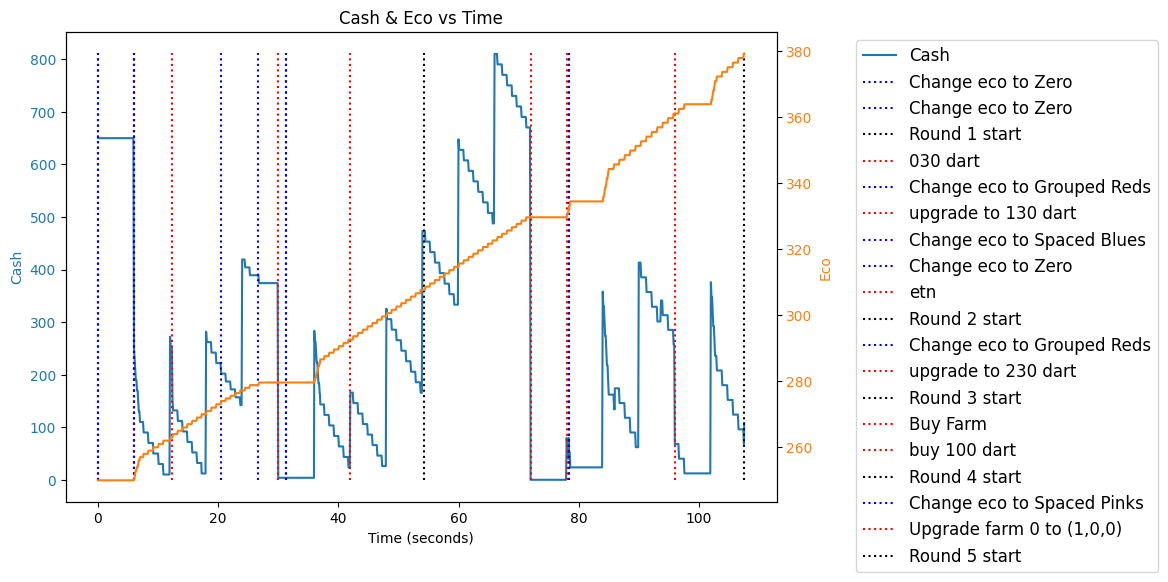

In [3]:
early_dart(spaced_yellows = False)

Warning! The eco send Grouped Reds is not available yet! Switching to the zero send for now, we will attempt to use this send later.


,Time,Type,Message
0,0.0,Eco,Change eco to Zero
1,0.0,Eco,Change eco to Zero
2,6.0,Round,Round 1 start
3,6.0,Buy,030 dart
4,6.0,Eco,Change eco to Grouped Reds
5,12.4,Buy,upgrade to 130 dart
6,20.4,Eco,Change eco to Spaced Blues
7,26.7,Eco,Change eco to Zero
8,30.0,Buy,etn
9,31.2,Round,Round 2 start


,Revenue,Expenses,Profit,Eco Impact,Start Time,End Time
Farm Index,,,,,,
0,160.0,1550,-1390.0,27.0,72.0,108.0


The current cash and eco are (106.79999999999819,379.1999999999991)


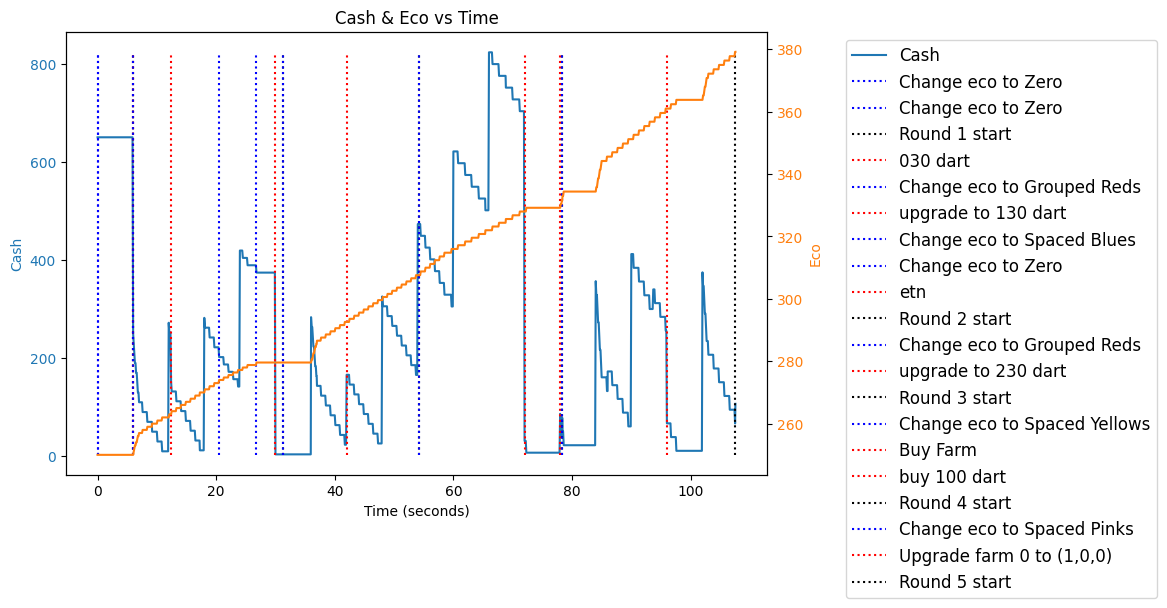

In [4]:
early_dart(spaced_yellows = True)

In [15]:
def early_bomb():
    rounds = b2.Rounds([(1,0.5),(2,0.1)], mode='Stall Factor')

    eco_queue = [
        b2.ecoSend(send_name='Grouped Reds', max_eco_amount=270),
        b2.ecoSend(send_name='Spaced Blues', max_eco_amount=280),
        b2.ecoSend(send_name='Zero'),
        b2.ecoSend(send_name='Grouped Reds', time = rounds.getTimeFromRound(1.75), max_eco_amount=290),
        b2.ecoSend(send_name='Spaced Greens', time = rounds.getTimeFromRound(2), max_eco_amount=290),
        b2.ecoSend(send_name='Zero')
    ]

    buy_queue = [
        [b2.buyDefense(650, message="etn", min_buy_time=rounds.getTimeFromRound(1))],
        [b2.buyDefense(525, message="buy 000 bomb", min_buy_time=rounds.getTimeFromRound(1.75))],
        [b2.buyDefense(500, message="upgrade to 002 bomb", min_buy_time=rounds.getTimeFromRound(2))],
        [b2.buyDefense(900, message="upgrade to 003 bomb", min_buy_time=rounds.getTimeFromRound(3))]
    ]

    initial_state_game = {
        'Cash': 650,
        'Eco': 250,
        'Eco Send': b2.ecoSend(send_name = 'Zero'),
        'Buy Queue': buy_queue,
        'Eco Queue': eco_queue,
        'Rounds': rounds, #Determines the lengths of the rounds in the game state
        'Game Round': 0
    }


    game_state = b2.GameState(initial_state_game)
    game_state.fastForward(target_round = 3.25)
    dd.viewHistory(game_state)
    print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
    b2.writeLog(game_state.logs, filename = 'early_bomb')

Warning! The eco send Grouped Reds is not available yet! Switching to the zero send for now, we will attempt to use this send later.


,Time,Type,Message
0,0.0,Eco,Change eco to Zero
1,0.0,Eco,Change eco to Zero
2,6.0,Round,Round 1 start
3,6.0,Buy,etn
4,6.0,Eco,Change eco to Grouped Reds
5,17.2,Eco,Change eco to Spaced Blues
6,25.0,Buy,buy 000 bomb
7,31.2,Round,Round 2 start
8,32.5,Eco,Change eco to Zero
9,32.5,Eco,Change eco to Grouped Reds


The current cash and eco are (54.90000000000009,290.2999999999999)


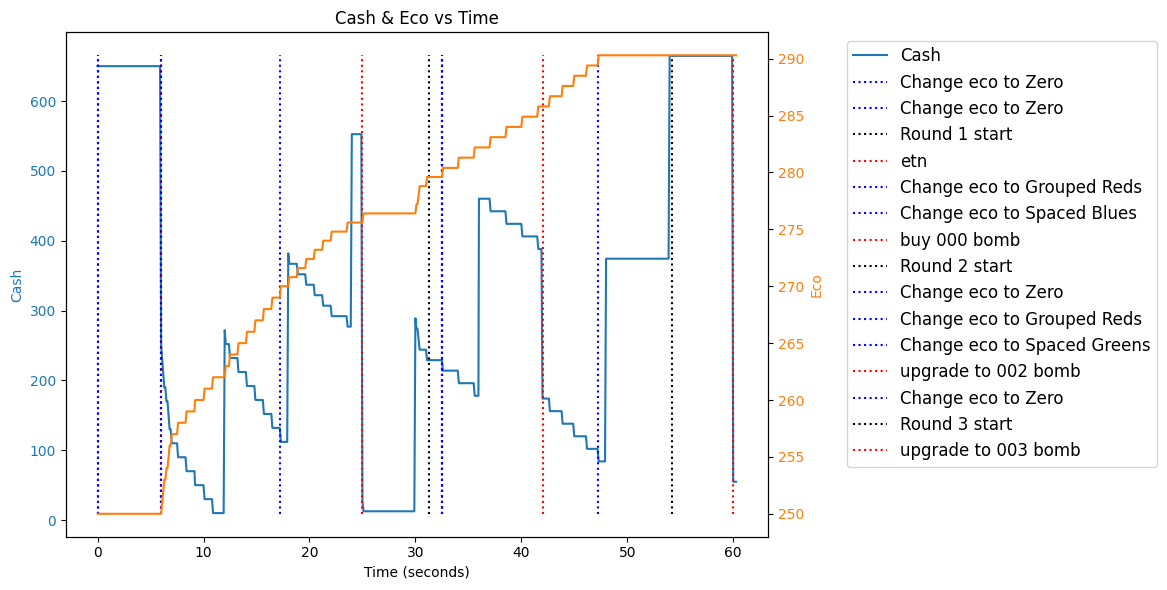

In [16]:
early_bomb()